In [1]:
import numpy as np
%load_ext autoreload
%autoreload 2
from constants import *
from plot_config import *
from sample_analysis import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# Failure times loading parameters
N_SAMPLES = 40
N_SEGMENTS = 8
start_id = 60
stop_id = start_id + N_SAMPLES
IDS = np.arange(start_id, stop_id)
FILE_NAMES = [f'id=00{str(id)}.h5' for id in IDS]

VERBOSE = True
PLOT_CHECK = False
SAVE_PLOT = True

In [3]:
# Physical parameters
DT = 9e-7    # Time discretization in units of TAU_ALPHA
SIGMA = 3.5    # Sets the timescale of avalanches
TAU = 1.27   # Exponent of the power-law distribution of avalanche sizes

In [4]:
COMPUTE_ACTIVITY_FOR_RANDOM_MICROSCOPIC_EVENT = True
COMPUTE_ACTIVITY_FOR_RANDOM_HEIGHTS = True
COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS = True

THRESHOLD = 1

# Number of peaks to consider when randomly selecting peaks
RANDOM_SEED = 0
N_RANDOM_PEAKS = 6000

# Number of time windows to consider when counting events
T = 50
T_START = 1e-14
T_END = 2

# Number of peak heights to consider when filtering peaks
N_H = 10
START_STD_H = 0
END_STD_H = 18
VAR_H = 0.05

In [5]:
all_failure_times, _ = load_failure_data(filenames=FILE_NAMES,
                                         directory=FAILURE_DATA_DIR,
                                         loading_segments=N_SEGMENTS,
                                         verbose=False)

for failure_times in all_failure_times:
    failure_times /= TAU_ALPHA

100%|██████████| 40/40 [04:17<00:00,  6.43s/it]


In [6]:
all_heights_stats = all_sample_heights_stats(all_failure_times=all_failure_times,
                                             sigma=SIGMA,
                                             dt=DT,
                                             threshold=THRESHOLD,
                                             save=True,
                                             filename=f"heights_{start_id}-{stop_id - 1}_{N_SEGMENTS}seg_sigma{SIGMA}_threshold{THRESHOLD}.pkl")

MEAN_H = all_heights_stats['mean_all_h']
STD_H = all_heights_stats['std_all_h']
all_peak_heights = all_heights_stats['all_peak_h']
MEAN_SMOOTH_ACTIVITY = all_heights_stats['mean_smooth_activity']

print(f"Number of peaks across {N_SAMPLES} samples: {len(all_peak_heights)}")
print(f"Mean height: {MEAN_H}")
print(f"Std height: {STD_H}")
print(f"Mean smooth activity: {MEAN_SMOOTH_ACTIVITY}")

N_STD = np.linspace(START_STD_H, END_STD_H, N_H)
HEIGHTS = MEAN_H + N_STD * STD_H
print(f"Peak heights: {HEIGHTS}")

Computing heights: 100%|██████████| 40/40 [05:47<00:00,  8.69s/it]


Number of peaks across 40 samples: 11518889
Mean height: 15794390.415622445
Std height: 53373440.820721366
Mean smooth activity: 1184076.361861875
Peak heights: [1.57943904e+07 1.22541272e+08 2.29288154e+08 3.36035035e+08
 4.42781917e+08 5.49528799e+08 6.56275680e+08 7.63022562e+08
 8.69769444e+08 9.76516325e+08]


In [7]:
fit = powerlaw.Fit(all_peak_heights, xmin=min(all_peak_heights), xmax=max(all_peak_heights), discrete=True)
print(f"Exponent: {fit.alpha}")
print(f"Error: {fit.sigma}")

Exponent: 1.3001473567394353
Error: 8.843602757509097e-05


In [8]:
height_bin_infos = {
    'mean_h': MEAN_H,
    'std_h': STD_H,
    'n_std': N_STD,
    'heights': HEIGHTS,
}

HEIGHTS_dir = os.path.join(SAVE_DIR, "sample_data/heights_info")
if not os.path.exists(HEIGHTS_dir):
    os.makedirs(HEIGHTS_dir)
save_path = os.path.join(HEIGHTS_dir,
                         f"HEIGHTS_{start_id}-{stop_id - 1}_{N_SEGMENTS}seg_sigma{SIGMA}_threshold{THRESHOLD}.pkl")
with open(save_path, 'wb') as f:
    pickle.dump(height_bin_infos, f)

In [9]:
output_dicts = []
for i, failure_times in enumerate(all_failure_times):
    print(f"SAMPLE {i + 1}")
    output_dicts.append(
        sample_analysis(times=failure_times,
                        sigma=SIGMA,
                        dt=DT,
                        threshold=THRESHOLD,
                        compute_activity_for_random_heights=COMPUTE_ACTIVITY_FOR_RANDOM_HEIGHTS,
                        compute_activity_for_given_heights=COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS,
                        n_random_peaks=N_RANDOM_PEAKS,
                        heights=HEIGHTS,
                        var_h=VAR_H,
                        t_start=T_START,
                        t_stop=T_END,
                        num_time_windows=T,
                        random_seed=RANDOM_SEED,
                        save=True,
                        filename=f"sample_{IDS[i]}_{N_SEGMENTS}seg_sigma{SIGMA}_threshold{THRESHOLD}_{N_RANDOM_PEAKS}rpeak_T{T}.pkl", )
    )
    print(f"{50 * '='}\n")

SAMPLE 1
Computing activity for random heights
- Number of random peaks =  5245
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2750, 122541272.05706517: 929, 229288153.6985079: 481, 336035035.3399507: 283, 442781916.9813934: 183, 549528798.6228361: 114, 656275680.2642789: 71, 763022561.9057215: 67, 869769443.5471643: 33, 976516325.1886071: 26}
- Number of peaks after =  {15794390.415622445: 2750, 122541272.05706517: 929, 229288153.6985079: 481, 336035035.3399507: 283, 442781916.9813934: 183, 549528798.6228361: 114, 656275680.2642789: 71, 763022561.9057215: 67, 869769443.5471643: 33, 976516325.1886071: 26}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 34.69it/s]



SAMPLE 2
Computing activity for random heights
- Number of random peaks =  5451
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2927, 122541272.05706517: 946, 229288153.6985079: 505, 336035035.3399507: 295, 442781916.9813934: 188, 549528798.6228361: 134, 656275680.2642789: 62, 763022561.9057215: 64, 869769443.5471643: 38, 976516325.1886071: 23}
- Number of peaks after =  {15794390.415622445: 2927, 122541272.05706517: 946, 229288153.6985079: 505, 336035035.3399507: 295, 442781916.9813934: 188, 549528798.6228361: 134, 656275680.2642789: 62, 763022561.9057215: 64, 869769443.5471643: 38, 976516325.1886071: 23}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 33.78it/s]



SAMPLE 3
Computing activity for random heights
- Number of random peaks =  5364
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2856, 122541272.05706517: 908, 229288153.6985079: 482, 336035035.3399507: 278, 442781916.9813934: 186, 549528798.6228361: 120, 656275680.2642789: 75, 763022561.9057215: 58, 869769443.5471643: 28, 976516325.1886071: 36}
- Number of peaks after =  {15794390.415622445: 2856, 122541272.05706517: 908, 229288153.6985079: 482, 336035035.3399507: 278, 442781916.9813934: 186, 549528798.6228361: 120, 656275680.2642789: 75, 763022561.9057215: 58, 869769443.5471643: 28, 976516325.1886071: 36}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 35.75it/s]



SAMPLE 4
Computing activity for random heights
- Number of random peaks =  5305
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2775, 122541272.05706517: 914, 229288153.6985079: 481, 336035035.3399507: 292, 442781916.9813934: 179, 549528798.6228361: 113, 656275680.2642789: 64, 763022561.9057215: 60, 869769443.5471643: 29, 976516325.1886071: 23}
- Number of peaks after =  {15794390.415622445: 2775, 122541272.05706517: 914, 229288153.6985079: 481, 336035035.3399507: 292, 442781916.9813934: 179, 549528798.6228361: 113, 656275680.2642789: 64, 763022561.9057215: 60, 869769443.5471643: 29, 976516325.1886071: 23}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 35.09it/s]



SAMPLE 5
Computing activity for random heights
- Number of random peaks =  5444
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 3000, 122541272.05706517: 931, 229288153.6985079: 503, 336035035.3399507: 307, 442781916.9813934: 186, 549528798.6228361: 127, 656275680.2642789: 86, 763022561.9057215: 50, 869769443.5471643: 45, 976516325.1886071: 28}
- Number of peaks after =  {15794390.415622445: 3000, 122541272.05706517: 931, 229288153.6985079: 503, 336035035.3399507: 307, 442781916.9813934: 186, 549528798.6228361: 127, 656275680.2642789: 86, 763022561.9057215: 50, 869769443.5471643: 45, 976516325.1886071: 28}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 31.77it/s]



SAMPLE 6
Computing activity for random heights
- Number of random peaks =  5283
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2791, 122541272.05706517: 877, 229288153.6985079: 529, 336035035.3399507: 253, 442781916.9813934: 176, 549528798.6228361: 120, 656275680.2642789: 82, 763022561.9057215: 51, 869769443.5471643: 40, 976516325.1886071: 29}
- Number of peaks after =  {15794390.415622445: 2791, 122541272.05706517: 877, 229288153.6985079: 529, 336035035.3399507: 253, 442781916.9813934: 176, 549528798.6228361: 120, 656275680.2642789: 82, 763022561.9057215: 51, 869769443.5471643: 40, 976516325.1886071: 29}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 26.57it/s]



SAMPLE 7
Computing activity for random heights
- Number of random peaks =  5283
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2753, 122541272.05706517: 849, 229288153.6985079: 482, 336035035.3399507: 279, 442781916.9813934: 185, 549528798.6228361: 113, 656275680.2642789: 80, 763022561.9057215: 60, 869769443.5471643: 37, 976516325.1886071: 25}
- Number of peaks after =  {15794390.415622445: 2753, 122541272.05706517: 849, 229288153.6985079: 482, 336035035.3399507: 279, 442781916.9813934: 185, 549528798.6228361: 113, 656275680.2642789: 80, 763022561.9057215: 60, 869769443.5471643: 37, 976516325.1886071: 25}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 24.06it/s]



SAMPLE 8
Computing activity for random heights
- Number of random peaks =  5464
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2925, 122541272.05706517: 919, 229288153.6985079: 548, 336035035.3399507: 286, 442781916.9813934: 177, 549528798.6228361: 98, 656275680.2642789: 80, 763022561.9057215: 44, 869769443.5471643: 29, 976516325.1886071: 32}
- Number of peaks after =  {15794390.415622445: 2925, 122541272.05706517: 919, 229288153.6985079: 548, 336035035.3399507: 286, 442781916.9813934: 177, 549528798.6228361: 98, 656275680.2642789: 80, 763022561.9057215: 44, 869769443.5471643: 29, 976516325.1886071: 32}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 23.29it/s]



SAMPLE 9
Computing activity for random heights
- Number of random peaks =  5430
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2837, 122541272.05706517: 887, 229288153.6985079: 498, 336035035.3399507: 294, 442781916.9813934: 200, 549528798.6228361: 111, 656275680.2642789: 67, 763022561.9057215: 50, 869769443.5471643: 41, 976516325.1886071: 23}
- Number of peaks after =  {15794390.415622445: 2837, 122541272.05706517: 887, 229288153.6985079: 498, 336035035.3399507: 294, 442781916.9813934: 200, 549528798.6228361: 111, 656275680.2642789: 67, 763022561.9057215: 50, 869769443.5471643: 41, 976516325.1886071: 23}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 23.03it/s]



SAMPLE 10
Computing activity for random heights
- Number of random peaks =  5248
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2849, 122541272.05706517: 931, 229288153.6985079: 456, 336035035.3399507: 274, 442781916.9813934: 170, 549528798.6228361: 92, 656275680.2642789: 72, 763022561.9057215: 42, 869769443.5471643: 32, 976516325.1886071: 26}
- Number of peaks after =  {15794390.415622445: 2849, 122541272.05706517: 931, 229288153.6985079: 456, 336035035.3399507: 274, 442781916.9813934: 170, 549528798.6228361: 92, 656275680.2642789: 72, 763022561.9057215: 42, 869769443.5471643: 32, 976516325.1886071: 26}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 22.68it/s]



SAMPLE 11
Computing activity for random heights
- Number of random peaks =  5441
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2908, 122541272.05706517: 993, 229288153.6985079: 499, 336035035.3399507: 282, 442781916.9813934: 173, 549528798.6228361: 126, 656275680.2642789: 61, 763022561.9057215: 44, 869769443.5471643: 41, 976516325.1886071: 31}
- Number of peaks after =  {15794390.415622445: 2908, 122541272.05706517: 993, 229288153.6985079: 499, 336035035.3399507: 282, 442781916.9813934: 173, 549528798.6228361: 126, 656275680.2642789: 61, 763022561.9057215: 44, 869769443.5471643: 41, 976516325.1886071: 31}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 22.19it/s]



SAMPLE 12
Computing activity for random heights
- Number of random peaks =  5448
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2998, 122541272.05706517: 978, 229288153.6985079: 471, 336035035.3399507: 309, 442781916.9813934: 171, 549528798.6228361: 123, 656275680.2642789: 78, 763022561.9057215: 56, 869769443.5471643: 57, 976516325.1886071: 30}
- Number of peaks after =  {15794390.415622445: 2998, 122541272.05706517: 978, 229288153.6985079: 471, 336035035.3399507: 309, 442781916.9813934: 171, 549528798.6228361: 123, 656275680.2642789: 78, 763022561.9057215: 56, 869769443.5471643: 57, 976516325.1886071: 30}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 21.52it/s]



SAMPLE 13
Computing activity for random heights
- Number of random peaks =  5292
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2760, 122541272.05706517: 931, 229288153.6985079: 473, 336035035.3399507: 286, 442781916.9813934: 193, 549528798.6228361: 130, 656275680.2642789: 85, 763022561.9057215: 62, 869769443.5471643: 34, 976516325.1886071: 23}
- Number of peaks after =  {15794390.415622445: 2760, 122541272.05706517: 931, 229288153.6985079: 473, 336035035.3399507: 286, 442781916.9813934: 193, 549528798.6228361: 130, 656275680.2642789: 85, 763022561.9057215: 62, 869769443.5471643: 34, 976516325.1886071: 23}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 21.19it/s]



SAMPLE 14
Computing activity for random heights
- Number of random peaks =  5308
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2894, 122541272.05706517: 884, 229288153.6985079: 516, 336035035.3399507: 289, 442781916.9813934: 172, 549528798.6228361: 92, 656275680.2642789: 73, 763022561.9057215: 49, 869769443.5471643: 42, 976516325.1886071: 27}
- Number of peaks after =  {15794390.415622445: 2894, 122541272.05706517: 884, 229288153.6985079: 516, 336035035.3399507: 289, 442781916.9813934: 172, 549528798.6228361: 92, 656275680.2642789: 73, 763022561.9057215: 49, 869769443.5471643: 42, 976516325.1886071: 27}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 20.90it/s]



SAMPLE 15
Computing activity for random heights
- Number of random peaks =  5419
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2827, 122541272.05706517: 1006, 229288153.6985079: 502, 336035035.3399507: 291, 442781916.9813934: 173, 549528798.6228361: 127, 656275680.2642789: 82, 763022561.9057215: 64, 869769443.5471643: 32, 976516325.1886071: 24}
- Number of peaks after =  {15794390.415622445: 2827, 122541272.05706517: 1006, 229288153.6985079: 502, 336035035.3399507: 291, 442781916.9813934: 173, 549528798.6228361: 127, 656275680.2642789: 82, 763022561.9057215: 64, 869769443.5471643: 32, 976516325.1886071: 24}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 20.64it/s]



SAMPLE 16
Computing activity for random heights
- Number of random peaks =  5064
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2714, 122541272.05706517: 883, 229288153.6985079: 437, 336035035.3399507: 288, 442781916.9813934: 170, 549528798.6228361: 119, 656275680.2642789: 55, 763022561.9057215: 50, 869769443.5471643: 40, 976516325.1886071: 23}
- Number of peaks after =  {15794390.415622445: 2714, 122541272.05706517: 883, 229288153.6985079: 437, 336035035.3399507: 288, 442781916.9813934: 170, 549528798.6228361: 119, 656275680.2642789: 55, 763022561.9057215: 50, 869769443.5471643: 40, 976516325.1886071: 23}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 19.44it/s]



SAMPLE 17
Computing activity for random heights
- Number of random peaks =  5198
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2809, 122541272.05706517: 902, 229288153.6985079: 484, 336035035.3399507: 294, 442781916.9813934: 162, 549528798.6228361: 111, 656275680.2642789: 88, 763022561.9057215: 54, 869769443.5471643: 52, 976516325.1886071: 32}
- Number of peaks after =  {15794390.415622445: 2809, 122541272.05706517: 902, 229288153.6985079: 484, 336035035.3399507: 294, 442781916.9813934: 162, 549528798.6228361: 111, 656275680.2642789: 88, 763022561.9057215: 54, 869769443.5471643: 52, 976516325.1886071: 32}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 19.89it/s]



SAMPLE 18
Computing activity for random heights
- Number of random peaks =  5343
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2791, 122541272.05706517: 906, 229288153.6985079: 523, 336035035.3399507: 293, 442781916.9813934: 186, 549528798.6228361: 105, 656275680.2642789: 68, 763022561.9057215: 48, 869769443.5471643: 40, 976516325.1886071: 28}
- Number of peaks after =  {15794390.415622445: 2791, 122541272.05706517: 906, 229288153.6985079: 523, 336035035.3399507: 293, 442781916.9813934: 186, 549528798.6228361: 105, 656275680.2642789: 68, 763022561.9057215: 48, 869769443.5471643: 40, 976516325.1886071: 28}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 19.60it/s]



SAMPLE 19
Computing activity for random heights
- Number of random peaks =  5124
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2691, 122541272.05706517: 926, 229288153.6985079: 437, 336035035.3399507: 286, 442781916.9813934: 170, 549528798.6228361: 108, 656275680.2642789: 58, 763022561.9057215: 50, 869769443.5471643: 23, 976516325.1886071: 26}
- Number of peaks after =  {15794390.415622445: 2691, 122541272.05706517: 926, 229288153.6985079: 437, 336035035.3399507: 286, 442781916.9813934: 170, 549528798.6228361: 108, 656275680.2642789: 58, 763022561.9057215: 50, 869769443.5471643: 23, 976516325.1886071: 26}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 19.39it/s]



SAMPLE 20
Computing activity for random heights
- Number of random peaks =  5376
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2869, 122541272.05706517: 936, 229288153.6985079: 474, 336035035.3399507: 300, 442781916.9813934: 192, 549528798.6228361: 129, 656275680.2642789: 71, 763022561.9057215: 52, 869769443.5471643: 31, 976516325.1886071: 22}
- Number of peaks after =  {15794390.415622445: 2869, 122541272.05706517: 936, 229288153.6985079: 474, 336035035.3399507: 300, 442781916.9813934: 192, 549528798.6228361: 129, 656275680.2642789: 71, 763022561.9057215: 52, 869769443.5471643: 31, 976516325.1886071: 22}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 18.72it/s]



SAMPLE 21
Computing activity for random heights
- Number of random peaks =  5398
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2858, 122541272.05706517: 893, 229288153.6985079: 447, 336035035.3399507: 249, 442781916.9813934: 150, 549528798.6228361: 110, 656275680.2642789: 88, 763022561.9057215: 57, 869769443.5471643: 37, 976516325.1886071: 18}
- Number of peaks after =  {15794390.415622445: 2858, 122541272.05706517: 893, 229288153.6985079: 447, 336035035.3399507: 249, 442781916.9813934: 150, 549528798.6228361: 110, 656275680.2642789: 88, 763022561.9057215: 57, 869769443.5471643: 37, 976516325.1886071: 18}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 20.57it/s]



SAMPLE 22
Computing activity for random heights
- Number of random peaks =  5336
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2873, 122541272.05706517: 940, 229288153.6985079: 491, 336035035.3399507: 279, 442781916.9813934: 173, 549528798.6228361: 124, 656275680.2642789: 74, 763022561.9057215: 51, 869769443.5471643: 39, 976516325.1886071: 36}
- Number of peaks after =  {15794390.415622445: 2873, 122541272.05706517: 940, 229288153.6985079: 491, 336035035.3399507: 279, 442781916.9813934: 173, 549528798.6228361: 124, 656275680.2642789: 74, 763022561.9057215: 51, 869769443.5471643: 39, 976516325.1886071: 36}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 21.04it/s]



SAMPLE 23
Computing activity for random heights
- Number of random peaks =  5193
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2718, 122541272.05706517: 879, 229288153.6985079: 458, 336035035.3399507: 245, 442781916.9813934: 203, 549528798.6228361: 116, 656275680.2642789: 64, 763022561.9057215: 54, 869769443.5471643: 37, 976516325.1886071: 22}
- Number of peaks after =  {15794390.415622445: 2718, 122541272.05706517: 879, 229288153.6985079: 458, 336035035.3399507: 245, 442781916.9813934: 203, 549528798.6228361: 116, 656275680.2642789: 64, 763022561.9057215: 54, 869769443.5471643: 37, 976516325.1886071: 22}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 22.31it/s]



SAMPLE 24
Computing activity for random heights
- Number of random peaks =  5314
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2894, 122541272.05706517: 922, 229288153.6985079: 477, 336035035.3399507: 295, 442781916.9813934: 167, 549528798.6228361: 114, 656275680.2642789: 68, 763022561.9057215: 53, 869769443.5471643: 37, 976516325.1886071: 23}
- Number of peaks after =  {15794390.415622445: 2894, 122541272.05706517: 922, 229288153.6985079: 477, 336035035.3399507: 295, 442781916.9813934: 167, 549528798.6228361: 114, 656275680.2642789: 68, 763022561.9057215: 53, 869769443.5471643: 37, 976516325.1886071: 23}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 20.82it/s]



SAMPLE 25
Computing activity for random heights
- Number of random peaks =  5363
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2835, 122541272.05706517: 918, 229288153.6985079: 431, 336035035.3399507: 290, 442781916.9813934: 191, 549528798.6228361: 115, 656275680.2642789: 64, 763022561.9057215: 56, 869769443.5471643: 31, 976516325.1886071: 26}
- Number of peaks after =  {15794390.415622445: 2835, 122541272.05706517: 918, 229288153.6985079: 431, 336035035.3399507: 290, 442781916.9813934: 191, 549528798.6228361: 115, 656275680.2642789: 64, 763022561.9057215: 56, 869769443.5471643: 31, 976516325.1886071: 26}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 22.53it/s]



SAMPLE 26
Computing activity for random heights
- Number of random peaks =  5179
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2706, 122541272.05706517: 944, 229288153.6985079: 438, 336035035.3399507: 286, 442781916.9813934: 169, 549528798.6228361: 111, 656275680.2642789: 74, 763022561.9057215: 61, 869769443.5471643: 34, 976516325.1886071: 25}
- Number of peaks after =  {15794390.415622445: 2706, 122541272.05706517: 944, 229288153.6985079: 438, 336035035.3399507: 286, 442781916.9813934: 169, 549528798.6228361: 111, 656275680.2642789: 74, 763022561.9057215: 61, 869769443.5471643: 34, 976516325.1886071: 25}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 23.27it/s]



SAMPLE 27
Computing activity for random heights
- Number of random peaks =  5428
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2887, 122541272.05706517: 913, 229288153.6985079: 481, 336035035.3399507: 292, 442781916.9813934: 174, 549528798.6228361: 132, 656275680.2642789: 79, 763022561.9057215: 49, 869769443.5471643: 42, 976516325.1886071: 25}
- Number of peaks after =  {15794390.415622445: 2887, 122541272.05706517: 913, 229288153.6985079: 481, 336035035.3399507: 292, 442781916.9813934: 174, 549528798.6228361: 132, 656275680.2642789: 79, 763022561.9057215: 49, 869769443.5471643: 42, 976516325.1886071: 25}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 21.86it/s]



SAMPLE 28
Computing activity for random heights
- Number of random peaks =  5205
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2795, 122541272.05706517: 866, 229288153.6985079: 465, 336035035.3399507: 279, 442781916.9813934: 157, 549528798.6228361: 111, 656275680.2642789: 81, 763022561.9057215: 47, 869769443.5471643: 50, 976516325.1886071: 20}
- Number of peaks after =  {15794390.415622445: 2795, 122541272.05706517: 866, 229288153.6985079: 465, 336035035.3399507: 279, 442781916.9813934: 157, 549528798.6228361: 111, 656275680.2642789: 81, 763022561.9057215: 47, 869769443.5471643: 50, 976516325.1886071: 20}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 23.94it/s]



SAMPLE 29
Computing activity for random heights
- Number of random peaks =  5320
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2818, 122541272.05706517: 927, 229288153.6985079: 499, 336035035.3399507: 299, 442781916.9813934: 188, 549528798.6228361: 119, 656275680.2642789: 84, 763022561.9057215: 70, 869769443.5471643: 42, 976516325.1886071: 25}
- Number of peaks after =  {15794390.415622445: 2818, 122541272.05706517: 927, 229288153.6985079: 499, 336035035.3399507: 299, 442781916.9813934: 188, 549528798.6228361: 119, 656275680.2642789: 84, 763022561.9057215: 70, 869769443.5471643: 42, 976516325.1886071: 25}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 21.62it/s]



SAMPLE 30
Computing activity for random heights
- Number of random peaks =  5377
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2923, 122541272.05706517: 944, 229288153.6985079: 460, 336035035.3399507: 296, 442781916.9813934: 175, 549528798.6228361: 122, 656275680.2642789: 68, 763022561.9057215: 63, 869769443.5471643: 30, 976516325.1886071: 23}
- Number of peaks after =  {15794390.415622445: 2923, 122541272.05706517: 944, 229288153.6985079: 460, 336035035.3399507: 296, 442781916.9813934: 175, 549528798.6228361: 122, 656275680.2642789: 68, 763022561.9057215: 63, 869769443.5471643: 30, 976516325.1886071: 23}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 23.84it/s]



SAMPLE 31
Computing activity for random heights
- Number of random peaks =  5302
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2814, 122541272.05706517: 905, 229288153.6985079: 454, 336035035.3399507: 263, 442781916.9813934: 187, 549528798.6228361: 108, 656275680.2642789: 80, 763022561.9057215: 46, 869769443.5471643: 45, 976516325.1886071: 27}
- Number of peaks after =  {15794390.415622445: 2814, 122541272.05706517: 905, 229288153.6985079: 454, 336035035.3399507: 263, 442781916.9813934: 187, 549528798.6228361: 108, 656275680.2642789: 80, 763022561.9057215: 46, 869769443.5471643: 45, 976516325.1886071: 27}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 23.99it/s]



SAMPLE 32
Computing activity for random heights
- Number of random peaks =  5297
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2850, 122541272.05706517: 925, 229288153.6985079: 472, 336035035.3399507: 269, 442781916.9813934: 191, 549528798.6228361: 98, 656275680.2642789: 79, 763022561.9057215: 53, 869769443.5471643: 40, 976516325.1886071: 23}
- Number of peaks after =  {15794390.415622445: 2850, 122541272.05706517: 925, 229288153.6985079: 472, 336035035.3399507: 269, 442781916.9813934: 191, 549528798.6228361: 98, 656275680.2642789: 79, 763022561.9057215: 53, 869769443.5471643: 40, 976516325.1886071: 23}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 22.17it/s]



SAMPLE 33
Computing activity for random heights
- Number of random peaks =  5456
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2898, 122541272.05706517: 916, 229288153.6985079: 512, 336035035.3399507: 286, 442781916.9813934: 198, 549528798.6228361: 116, 656275680.2642789: 72, 763022561.9057215: 48, 869769443.5471643: 41, 976516325.1886071: 20}
- Number of peaks after =  {15794390.415622445: 2898, 122541272.05706517: 916, 229288153.6985079: 512, 336035035.3399507: 286, 442781916.9813934: 198, 549528798.6228361: 116, 656275680.2642789: 72, 763022561.9057215: 48, 869769443.5471643: 41, 976516325.1886071: 20}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 24.13it/s]



SAMPLE 34
Computing activity for random heights
- Number of random peaks =  5251
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2837, 122541272.05706517: 897, 229288153.6985079: 489, 336035035.3399507: 264, 442781916.9813934: 193, 549528798.6228361: 108, 656275680.2642789: 77, 763022561.9057215: 52, 869769443.5471643: 38, 976516325.1886071: 25}
- Number of peaks after =  {15794390.415622445: 2837, 122541272.05706517: 897, 229288153.6985079: 489, 336035035.3399507: 264, 442781916.9813934: 193, 549528798.6228361: 108, 656275680.2642789: 77, 763022561.9057215: 52, 869769443.5471643: 38, 976516325.1886071: 25}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 20.91it/s]



SAMPLE 35
Computing activity for random heights
- Number of random peaks =  5338
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2905, 122541272.05706517: 849, 229288153.6985079: 474, 336035035.3399507: 319, 442781916.9813934: 208, 549528798.6228361: 106, 656275680.2642789: 65, 763022561.9057215: 55, 869769443.5471643: 54, 976516325.1886071: 30}
- Number of peaks after =  {15794390.415622445: 2905, 122541272.05706517: 849, 229288153.6985079: 474, 336035035.3399507: 319, 442781916.9813934: 208, 549528798.6228361: 106, 656275680.2642789: 65, 763022561.9057215: 55, 869769443.5471643: 54, 976516325.1886071: 30}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 21.85it/s]



SAMPLE 36
Computing activity for random heights
- Number of random peaks =  5256
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2778, 122541272.05706517: 869, 229288153.6985079: 460, 336035035.3399507: 299, 442781916.9813934: 170, 549528798.6228361: 109, 656275680.2642789: 65, 763022561.9057215: 53, 869769443.5471643: 36, 976516325.1886071: 29}
- Number of peaks after =  {15794390.415622445: 2778, 122541272.05706517: 869, 229288153.6985079: 460, 336035035.3399507: 299, 442781916.9813934: 170, 549528798.6228361: 109, 656275680.2642789: 65, 763022561.9057215: 53, 869769443.5471643: 36, 976516325.1886071: 29}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 23.97it/s]



SAMPLE 37
Computing activity for random heights
- Number of random peaks =  5338
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2845, 122541272.05706517: 932, 229288153.6985079: 465, 336035035.3399507: 277, 442781916.9813934: 160, 549528798.6228361: 134, 656275680.2642789: 88, 763022561.9057215: 53, 869769443.5471643: 43, 976516325.1886071: 17}
- Number of peaks after =  {15794390.415622445: 2845, 122541272.05706517: 932, 229288153.6985079: 465, 336035035.3399507: 277, 442781916.9813934: 160, 549528798.6228361: 134, 656275680.2642789: 88, 763022561.9057215: 53, 869769443.5471643: 43, 976516325.1886071: 17}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 21.09it/s]



SAMPLE 38
Computing activity for random heights
- Number of random peaks =  5216
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2740, 122541272.05706517: 883, 229288153.6985079: 481, 336035035.3399507: 301, 442781916.9813934: 183, 549528798.6228361: 119, 656275680.2642789: 82, 763022561.9057215: 52, 869769443.5471643: 38, 976516325.1886071: 21}
- Number of peaks after =  {15794390.415622445: 2740, 122541272.05706517: 883, 229288153.6985079: 481, 336035035.3399507: 301, 442781916.9813934: 183, 549528798.6228361: 119, 656275680.2642789: 82, 763022561.9057215: 52, 869769443.5471643: 38, 976516325.1886071: 21}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 25.31it/s]



SAMPLE 39
Computing activity for random heights
- Number of random peaks =  5340
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2862, 122541272.05706517: 858, 229288153.6985079: 498, 336035035.3399507: 269, 442781916.9813934: 182, 549528798.6228361: 141, 656275680.2642789: 77, 763022561.9057215: 50, 869769443.5471643: 38, 976516325.1886071: 30}
- Number of peaks after =  {15794390.415622445: 2862, 122541272.05706517: 858, 229288153.6985079: 498, 336035035.3399507: 269, 442781916.9813934: 182, 549528798.6228361: 141, 656275680.2642789: 77, 763022561.9057215: 50, 869769443.5471643: 38, 976516325.1886071: 30}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 25.79it/s]



SAMPLE 40
Computing activity for random heights
- Number of random peaks =  5276
Computing activity for given heights
- Number of peaks before =  {15794390.415622445: 2712, 122541272.05706517: 891, 229288153.6985079: 443, 336035035.3399507: 255, 442781916.9813934: 176, 549528798.6228361: 129, 656275680.2642789: 67, 763022561.9057215: 63, 869769443.5471643: 45, 976516325.1886071: 26}
- Number of peaks after =  {15794390.415622445: 2712, 122541272.05706517: 891, 229288153.6985079: 443, 336035035.3399507: 255, 442781916.9813934: 176, 549528798.6228361: 129, 656275680.2642789: 67, 763022561.9057215: 63, 869769443.5471643: 45, 976516325.1886071: 26}


Computing events after peaks: 100%|██████████| 10/10 [00:00<00:00, 24.01it/s]


In [10]:
if COMPUTE_ACTIVITY_FOR_RANDOM_MICROSCOPIC_EVENT: 
    n_events_around_micro_event_dict = n_events_around_microscopic_event(all_failure_times, 
                                                                         N_random_peaks=N_RANDOM_PEAKS, 
                                                                         t_start=T_START, 
                                                                         t_stop=T_END, 
                                                                         num_time_windows=T, 
                                                                         save=True, 
                                                                         filename=f"micro_event_{N_SAMPLES}samples_{N_SEGMENTS}seg_sigma{SIGMA}_threshold{THRESHOLD}_T{T}.pkl")

    micro_time_windows = n_events_around_micro_event_dict['time_windows']
    mean_n_micro_before = n_events_around_micro_event_dict['mean_n_before']
    mean_n_micro_after = n_events_around_micro_event_dict['mean_n_after']
    std_n_micro_before = n_events_around_micro_event_dict['std_n_before']
    std_n_micro_after = n_events_around_micro_event_dict['std_n_after']

    mean_a_micro_before = np.gradient(mean_n_micro_before, micro_time_windows)
    mean_a_micro_after = np.gradient(mean_n_micro_after, micro_time_windows)

    median_n_micro_before = np.median(n_events_around_micro_event_dict['n_before'], axis=0)
    median_n_micro_after = np.median(n_events_around_micro_event_dict['n_after'], axis=0)

Computing events around microscopic events: 100%|██████████| 40/40 [00:51<00:00,  1.29s/it]


In [11]:
if COMPUTE_ACTIVITY_FOR_RANDOM_HEIGHTS:
    random_time_windows = output_dicts[0]['random_time_windows']

    all_random_n_before = np.concatenate([output_dicts[i]['random_n_before'] for i in range(N_SAMPLES)], axis=0)
    mean_random_n_before = np.mean(all_random_n_before, axis=0)
    std_random_n_before = np.std(all_random_n_before, axis=0, ddof=1)

    all_random_n_after = np.concatenate([output_dicts[i]['random_n_after'] for i in range(N_SAMPLES)], axis=0)
    mean_random_n_after = np.mean(all_random_n_after, axis=0)
    std_random_n_after = np.std(all_random_n_after, axis=0, ddof=1)

    all_random_n_peaks = np.sum([output_dicts[i]['n_random_peaks'] for i in range(N_SAMPLES)], axis=0)

    random_activity_before = np.gradient(all_random_n_before, random_time_windows, axis=1)
    mean_random_activity_before = np.mean(random_activity_before, axis=0)
    std_random_activity_before = np.std(random_activity_before, axis=0, ddof=1)

    random_activity_after = np.gradient(all_random_n_after, random_time_windows, axis=1)
    mean_random_activity_after = np.mean(random_activity_after, axis=0)
    std_random_activity_after = np.std(random_activity_after, axis=0, ddof=1)

In [12]:
# Concatenate across samples for the same peak height
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    time_windows = output_dicts[0]['time_windows']

    all_n_before = [output_dicts[i]['n_before'] for i in range(N_SAMPLES)]
    all_n_before = concatenate_result(all_n_before, HEIGHTS, N_SAMPLES)
    mean_n_before = {h: np.mean(all_n_before[h], axis=0) for h in HEIGHTS}
    std_n_before = {h: np.std(all_n_before[h], axis=0, ddof=1) for h in HEIGHTS}

    all_n_after = [output_dicts[i]['n_after'] for i in range(N_SAMPLES)]
    all_n_after = concatenate_result(all_n_after, HEIGHTS, N_SAMPLES)
    mean_n_after = {h: np.mean(all_n_after[h], axis=0) for h in HEIGHTS}
    std_n_after = {h: np.std(all_n_after[h], axis=0, ddof=1) for h in HEIGHTS}

    all_n_peaks = [output_dicts[i]['n_peaks'] for i in range(N_SAMPLES)]
    all_n_peaks = {h: np.sum([all_n_peaks[i][h] for i in range(N_SAMPLES)]) for h in HEIGHTS}

    activity_before = {h: np.gradient(all_n_before[h], time_windows, axis=1) for h in HEIGHTS}
    mean_activity_before = {h: np.mean(activity_before[h], axis=0) for h in HEIGHTS}
    std_activity_before = {h: np.std(activity_before[h], axis=0, ddof=1) for h in HEIGHTS}

    activity_after = {h: np.gradient(all_n_after[h], time_windows, axis=1) for h in HEIGHTS}
    mean_activity_after = {h: np.mean(activity_after[h], axis=0) for h in HEIGHTS}
    std_activity_after = {h: np.std(activity_after[h], axis=0, ddof=1) for h in HEIGHTS}

    normalized_mean_activity_before = {h: mean_activity_before[h] / mean_activity_before[h][0] for h in HEIGHTS}
    normalized_mean_activity_after = {h: mean_activity_after[h] / mean_activity_after[h][0] for h in HEIGHTS}

# Distribution of Peak Heights

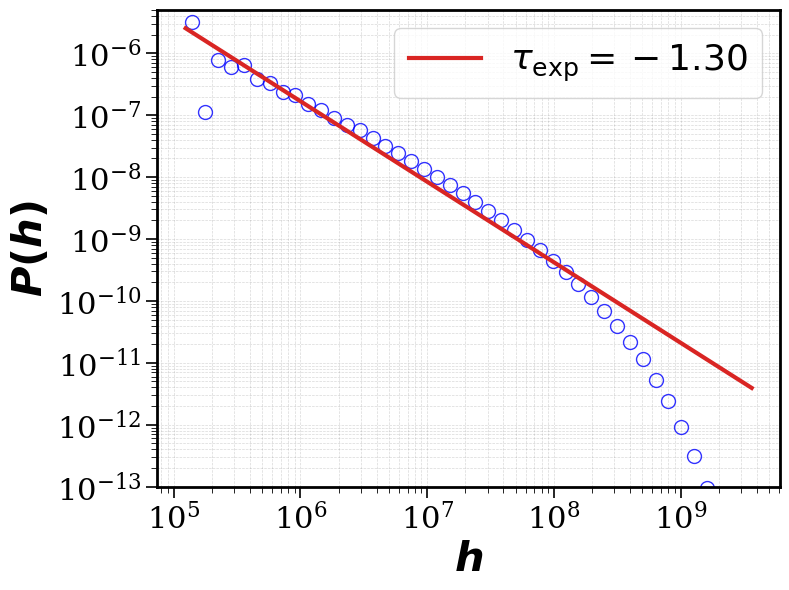

In [13]:
c_red = plt.get_cmap('Reds')
c_blue = plt.get_cmap('Blues')
c = ['blue', c_red(0.7)]
fig, ax = plt.subplots(figsize=(8, 6))
fit.plot_pdf(color=c[0], marker='o', linestyle='None', fillstyle='none', ax=ax, alpha=0.8)
fit.power_law.plot_pdf(color=c[1], linestyle='-', ax=ax , label=rf'$\tau_{{\rm exp}}=-{fit.alpha:.2f}$', linewidth=3)
ax.set_xlabel(r'$\boldsymbol{h}$')
ax.set_ylabel(r'$\boldsymbol{P(h)}$')
ax.legend()
plt.grid(True, alpha=0.3, linestyle='--', which='both')
plt.ylim(1e-13, 5e-6)
plt.tight_layout()

if SAVE_PLOT:
    save_dir = os.path.join(FIGURE_DIR)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(os.path.join(save_dir, 'heights_pdf.pdf'), bbox_inches='tight')
    with open(os.path.join(save_dir, 'heights_pdf.pkl'), 'wb') as f:
        pickle.dump(fig, f)

plt.show()

# Activity for Random Microscopic Event

Number of sampled peaks:  212315


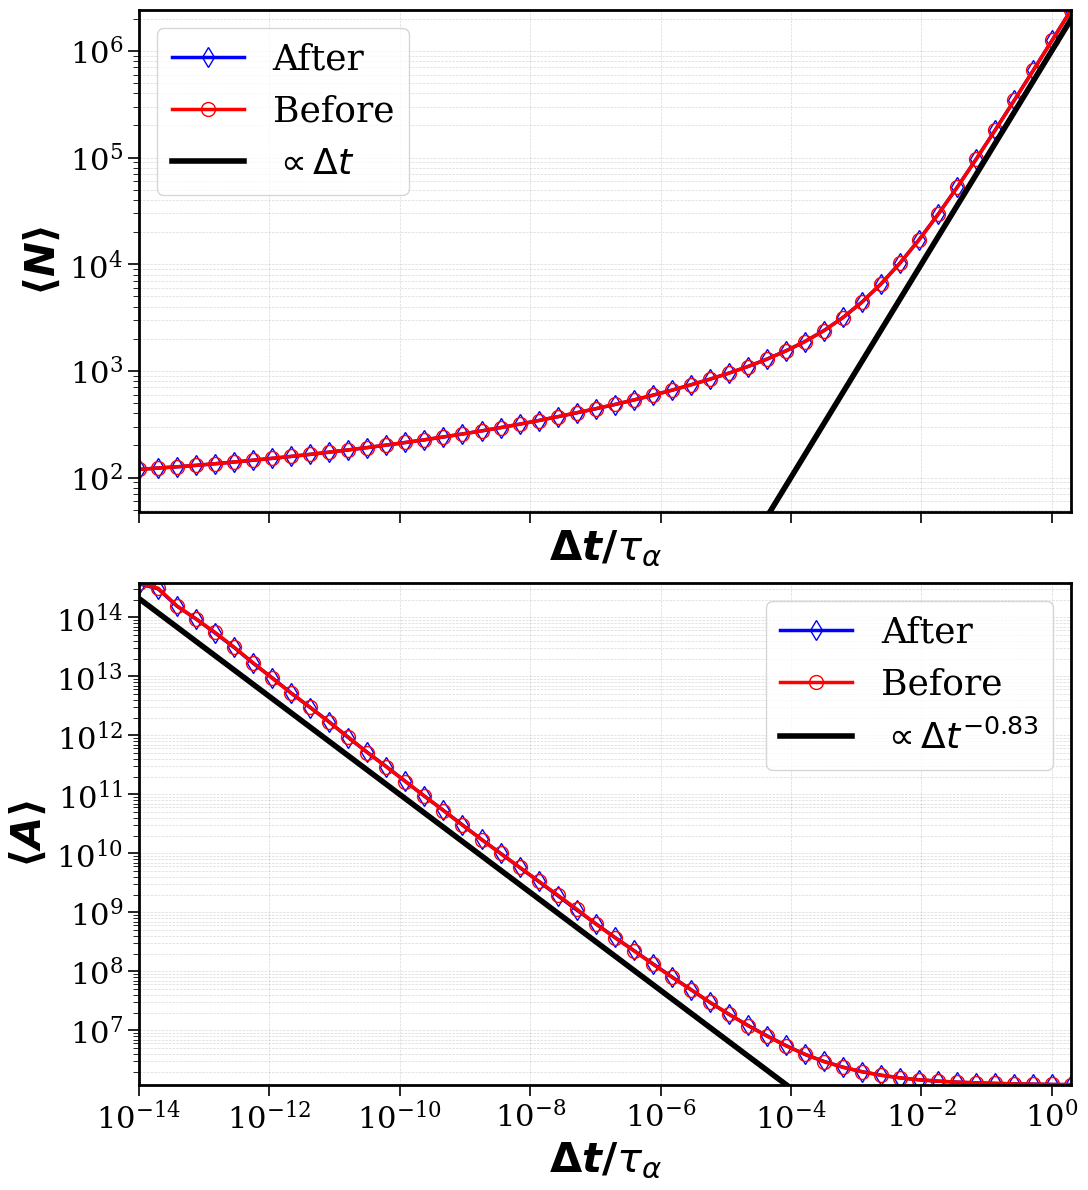

In [14]:
if COMPUTE_ACTIVITY_FOR_RANDOM_MICROSCOPIC_EVENT:
    print("Number of sampled peaks: ", len(n_events_around_micro_event_dict['n_before']))
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(11, 12))
    axs[0].plot(micro_time_windows, mean_n_micro_after, marker='d', fillstyle='none', linestyle='-', color='b', label='After')
    # axs[0].fill_between(micro_time_windows, mean_n_micro_before - std_n_micro_before, mean_n_micro_before + std_n_micro_before, color='b', alpha=0.25)
    
    axs[0].plot(micro_time_windows, mean_n_micro_before, marker='o', fillstyle='none', linestyle='-', color='r', label='Before')
    # axs[0].fill_between(micro_time_windows, mean_n_micro_after - std_n_micro_after, mean_n_micro_after + std_n_micro_after, color='r', alpha=0.25)

    axs[0].plot(micro_time_windows, 1e6 * micro_time_windows, linestyle='-', color='black', label=r'$\propto \Delta t$', linewidth=4)
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[0].set_ylabel(r'$\boldsymbol{\langle N \rangle}$')
    axs[0].set_xlim(min(micro_time_windows), max(micro_time_windows))
    axs[0].set_ylim(min([median_n_micro_before.min(), median_n_micro_after.min()]),
                    max([median_n_micro_before.max(), median_n_micro_after.max()]))
    axs[0].legend(loc='best')
    axs[0].grid(True, alpha=0.3, which='both', ls='--')

    axs[1].plot(micro_time_windows, mean_a_micro_after,marker='d', fillstyle='none', linestyle='-', color='b', label='After')
    axs[1].plot(micro_time_windows, mean_a_micro_before, marker='o',   fillstyle='none', linestyle='-', color='r', label='Before')
    axs[1].plot(micro_time_windows, 5e2*micro_time_windows**(-0.83), linestyle='-', color='black', label=r'$\propto \Delta t^{-0.83}$', linewidth=4)
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1].set_ylabel(r'$\boldsymbol{\langle A \rangle}$')
    axs[1].set_xlim(min(micro_time_windows), max(micro_time_windows))
    axs[1].set_ylim(min([mean_a_micro_before.min(), mean_a_micro_after.min()]),
                    max([mean_a_micro_before.max(), mean_a_micro_after.max()]))
    axs[1].legend(loc='best')
    axs[1].grid(True, alpha=0.3, which='both', ls='--')

    plt.tight_layout()

    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'activity_vs_time_random.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'activity_vs_time_random.pkl'), 'wb') as f:
            pickle.dump(fig, f)

    plt.show()

# Mean Activity for Random Peak Heights

Average taken over 212713 peaks


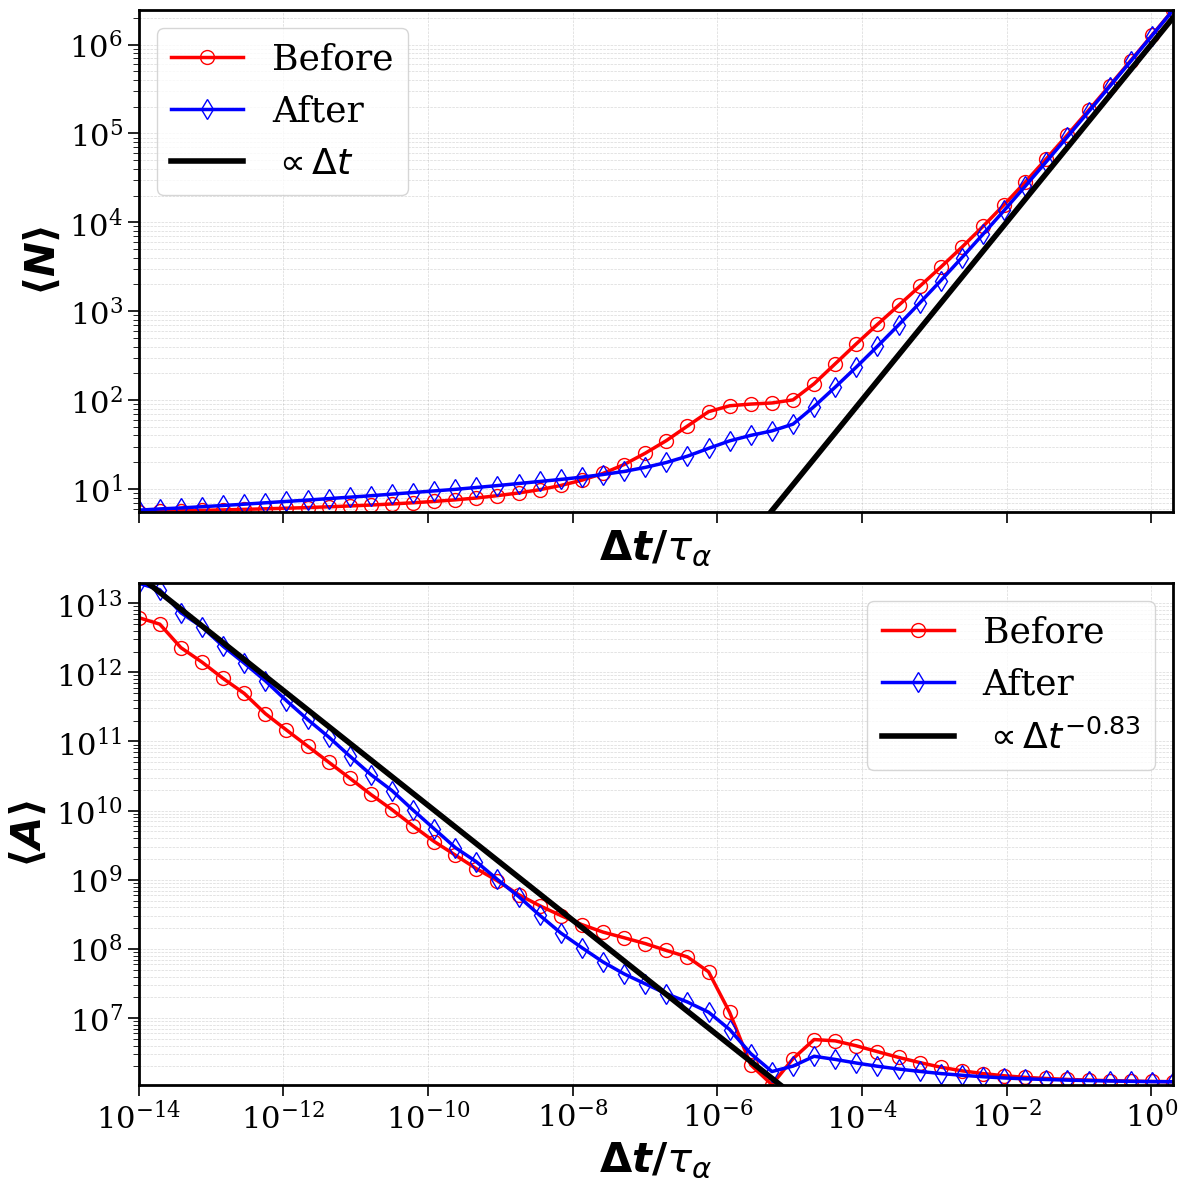

In [15]:
if COMPUTE_ACTIVITY_FOR_RANDOM_HEIGHTS:
    print(f"Average taken over {all_random_n_peaks} peaks")
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
    axs[0].plot(random_time_windows, mean_random_n_before, marker='o', fillstyle='none', linestyle='-', color='r', label='Before')
    axs[0].plot(random_time_windows, mean_random_n_after, marker='d', fillstyle='none', linestyle='-', color='b', label='After')
    axs[0].plot(random_time_windows, 1e6 * random_time_windows, linestyle='-', color='black', label=r'$\propto \Delta t$', linewidth=4)
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[0].set_ylabel(r'$\boldsymbol{\langle N \rangle}$')
    axs[0].set_xlim(min(random_time_windows), max(random_time_windows))
    axs[0].set_ylim(min([mean_random_n_before.min(), mean_random_n_after.min()]),
                    max([mean_random_n_before.max(), mean_random_n_after.max()]))
    axs[0].legend(loc='best')
    axs[0].grid(True, alpha=0.3, which='both', ls='--')

    axs[1].plot(random_time_windows, mean_random_activity_before,marker='o', fillstyle='none', linestyle='-', color='r', label='Before')
    axs[1].plot(random_time_windows, mean_random_activity_after, marker='d',   fillstyle='none', linestyle='-', color='b', label='After')
    axs[1].plot(random_time_windows, 6e1*random_time_windows**(-0.83), linestyle='-', color='black', label=r'$\propto \Delta t^{-0.83}$', linewidth=4)
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1].set_ylabel(r'$\boldsymbol{\langle A \rangle}$')
    axs[1].set_xlim(min(random_time_windows), max(random_time_windows))
    axs[1].set_ylim(min([mean_random_activity_before.min(), mean_random_activity_after.min()]),
                    max([mean_random_activity_before.max(), mean_random_activity_after.max()]))
    axs[1].legend(loc='best')
    axs[1].grid(True, alpha=0.3, which='both', ls='--')

    plt.tight_layout()
    
    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'activity_vs_time_random2.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'activity_vs_time_random2.pkl'), 'wb') as f:
            pickle.dump(fig, f)
    
    plt.show()

# Mean Activity for Given Peak Heights

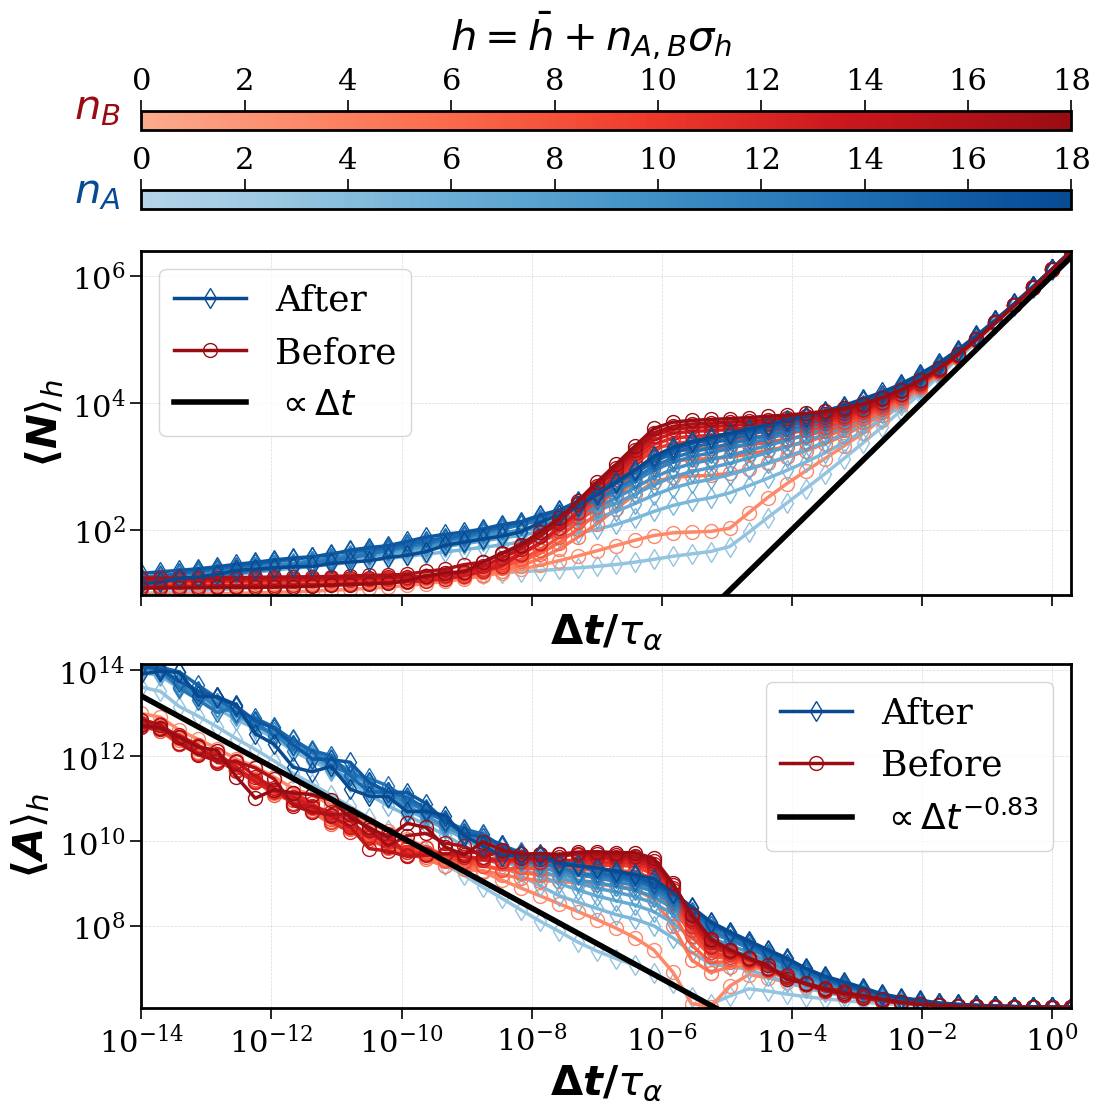

In [16]:
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    cmap_before = plt.get_cmap('Reds')
    colors_before = cmap_before(np.linspace(0.4, 0.9, N_H))
    cmap_after = plt.get_cmap('Blues')
    colors_after = cmap_after(np.linspace(0.4, 0.9, N_H))

    fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
    for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
        if i == len(N_STD)-1:
            axs[0].plot(time_windows, mean_n_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i], label='After')
            axs[0].plot(time_windows, mean_n_before[h], linestyle='-', fillstyle='none', marker='o', color=colors_before[i], label='Before')
            axs[1].plot(time_windows, mean_activity_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i], label='After')
            axs[1].plot(time_windows, mean_activity_before[h], linestyle='-', marker='o', fillstyle='none', color=colors_before[i], label='Before')
        else:
            axs[0].plot(time_windows, mean_n_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i])
            axs[0].plot(time_windows, mean_n_before[h], linestyle='-', fillstyle='none', marker='o', color=colors_before[i])
            axs[1].plot(time_windows, mean_activity_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i])
            axs[1].plot(time_windows, mean_activity_before[h], linestyle='-', marker='o', fillstyle='none', color=colors_before[i])

    axs[0].plot(time_windows, 1e6 * time_windows, linestyle='-', color='black', label=r'$\propto \Delta t$', linewidth=4)
    axs[1].plot(time_windows, 6e1 * time_windows**(-0.83), linestyle='-', color='black', label=r'$\propto \Delta t^{-0.83}$', linewidth=4)

    axs[0].legend()
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
    axs[0].grid(True, alpha=0.3, which='both', ls='--')
    axs[0].set_xlim(min(time_windows), max(time_windows))
    axs[0].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                    max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

    axs[1].legend()
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')
    axs[1].grid(True, alpha=0.3, which='both', ls='--')
    axs[1].set_xlim(min(time_windows), max(time_windows))
    axs[1].set_ylim(
        min([mean_activity_before[h].min() for h in HEIGHTS] + [mean_activity_after[h].min() for h in HEIGHTS]),
        max([mean_activity_before[h].max() for h in HEIGHTS] + [mean_activity_after[h].max() for h in HEIGHTS]))

    # Create horizontal colorbars
    norm_before = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_before = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_before(np.linspace(0.3, 0.9, 256))), norm=norm_before)
    sm_before.set_array([])
    cbar_before = fig.colorbar(sm_before, ax=axs, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50,
                               location='top')

    norm_after = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_after = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_after(np.linspace(0.3, 0.9, 256))), norm=norm_after)
    sm_after.set_array([])
    cbar_after = fig.colorbar(sm_after, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05, aspect=50,
                              location='top')

    # Add text annotations
    fig.text(0.088, 0.79, r'$n_A$', va='center', ha='center', rotation=0, fontsize=30, color=colors_after[-1])
    fig.text(0.088, 0.86, r'$n_B$', va='center', ha='center', rotation=0, fontsize=30, color=colors_before[-1])
    fig.text(0.5, 0.92, r'$h = \bar{h} + n_{A,B}\sigma_h$', va='center', ha='center', rotation=0, fontsize=30,
             color='black')

    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'activity_vs_time.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'activity_vs_time.pkl'), 'wb') as f:
            pickle.dump(fig, f)
    
    plt.show()

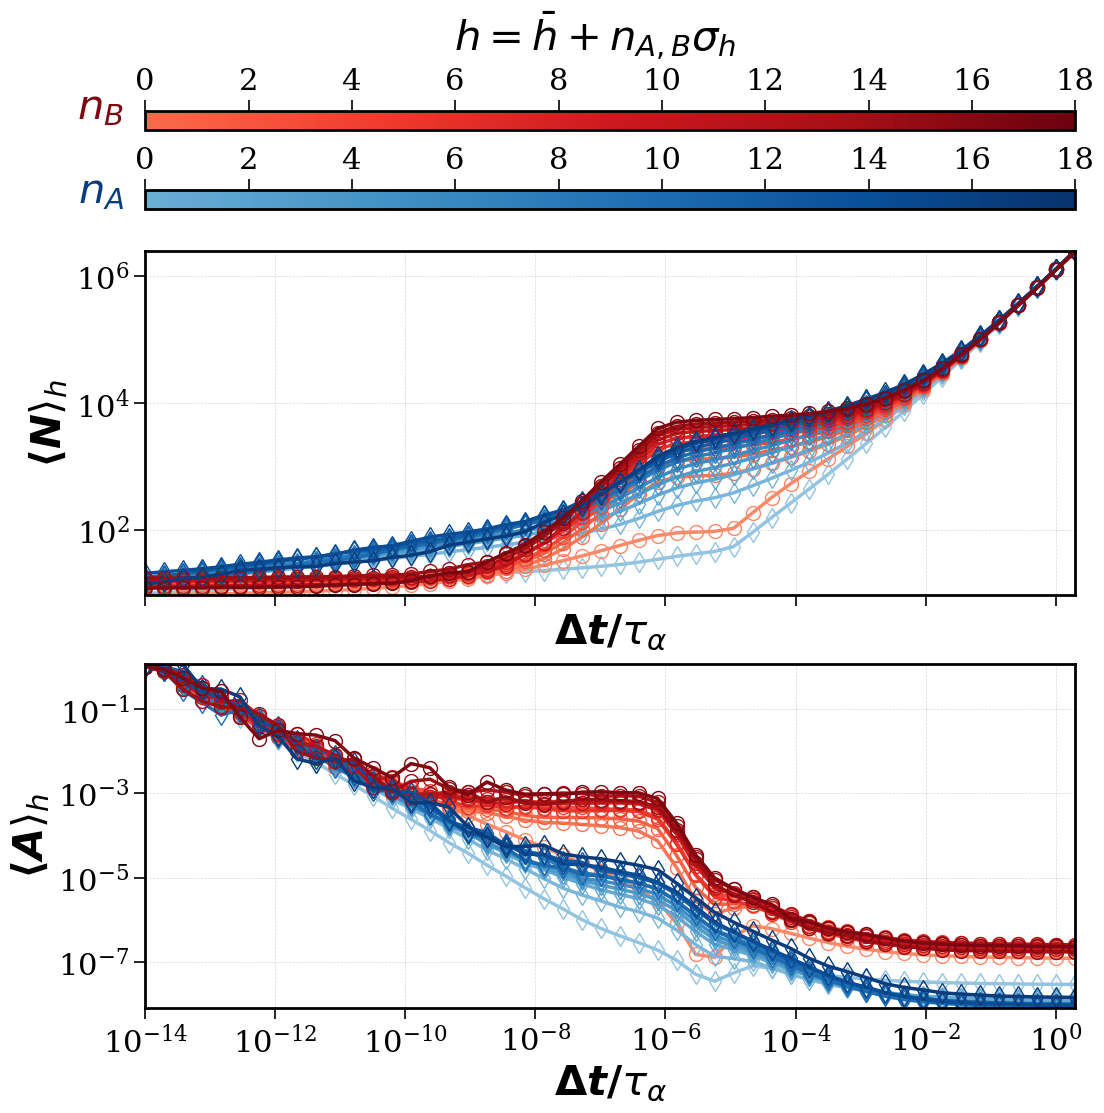

In [17]:
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    cmap_before = plt.get_cmap('Reds')
    colors_before = cmap_before(np.linspace(0.4, 0.95, N_H))
    cmap_after = plt.get_cmap('Blues')
    colors_after = cmap_after(np.linspace(0.4, 0.95, N_H))

    fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)
    for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
        axs[0].plot(time_windows, mean_n_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i], label=rf'A: $h=\bar h+{n_std:.0f}\sigma_h$')
        axs[0].plot(time_windows, mean_n_before[h], linestyle='-' , fillstyle='none', marker='o', color=colors_before[i], label=rf'B: $h=\bar h+{n_std:.0f}\sigma_h$')
        axs[1].plot(time_windows, normalized_mean_activity_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i])
        axs[1].plot(time_windows, normalized_mean_activity_before[h], linestyle='-', marker='o', fillstyle='none', color=colors_before[i])

    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
    axs[0].grid(True, alpha=0.3, which='both', ls='--')
    axs[0].set_xlim(min(time_windows), max(time_windows))
    axs[0].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                    max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')
    axs[1].grid(True, alpha=0.3, which='both', ls='--')
    axs[1].set_xlim(min(time_windows), max(time_windows))
    axs[1].set_ylim(
        min([normalized_mean_activity_before[h].min() for h in HEIGHTS] + [normalized_mean_activity_after[h].min() for h
                                                                           in HEIGHTS]),
        max([normalized_mean_activity_before[h].max() for h in HEIGHTS] + [normalized_mean_activity_after[h].max() for h
                                                                           in HEIGHTS]))

    # Create horizontal colorbars
    norm_before = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_before = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_before(np.linspace(0.5, 0.99, 256))), norm=norm_before)
    sm_before.set_array([])
    cbar_before = fig.colorbar(sm_before, ax=axs, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50,
                               location='top')

    norm_after = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_after = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_after(np.linspace(0.5, 0.99, 256))), norm=norm_after)
    sm_after.set_array([])
    cbar_after = fig.colorbar(sm_after, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05, aspect=50,
                              location='top')

    # Add text annotations
    fig.text(0.088, 0.79, r'$n_A$', va='center', ha='center', rotation=0, fontsize=30, color=colors_after[-1])
    fig.text(0.088, 0.86, r'$n_B$', va='center', ha='center', rotation=0, fontsize=30, color=colors_before[-1])
    fig.text(0.5, 0.92, r'$h = \bar{h} + n_{A,B}\sigma_h$', va='center', ha='center', rotation=0, fontsize=30,
             color='black')

    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'norm_activity_vs_time.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'norm_activity_vs_time.pkl'), 'wb') as f:
            pickle.dump(fig, f)
    plt.show()

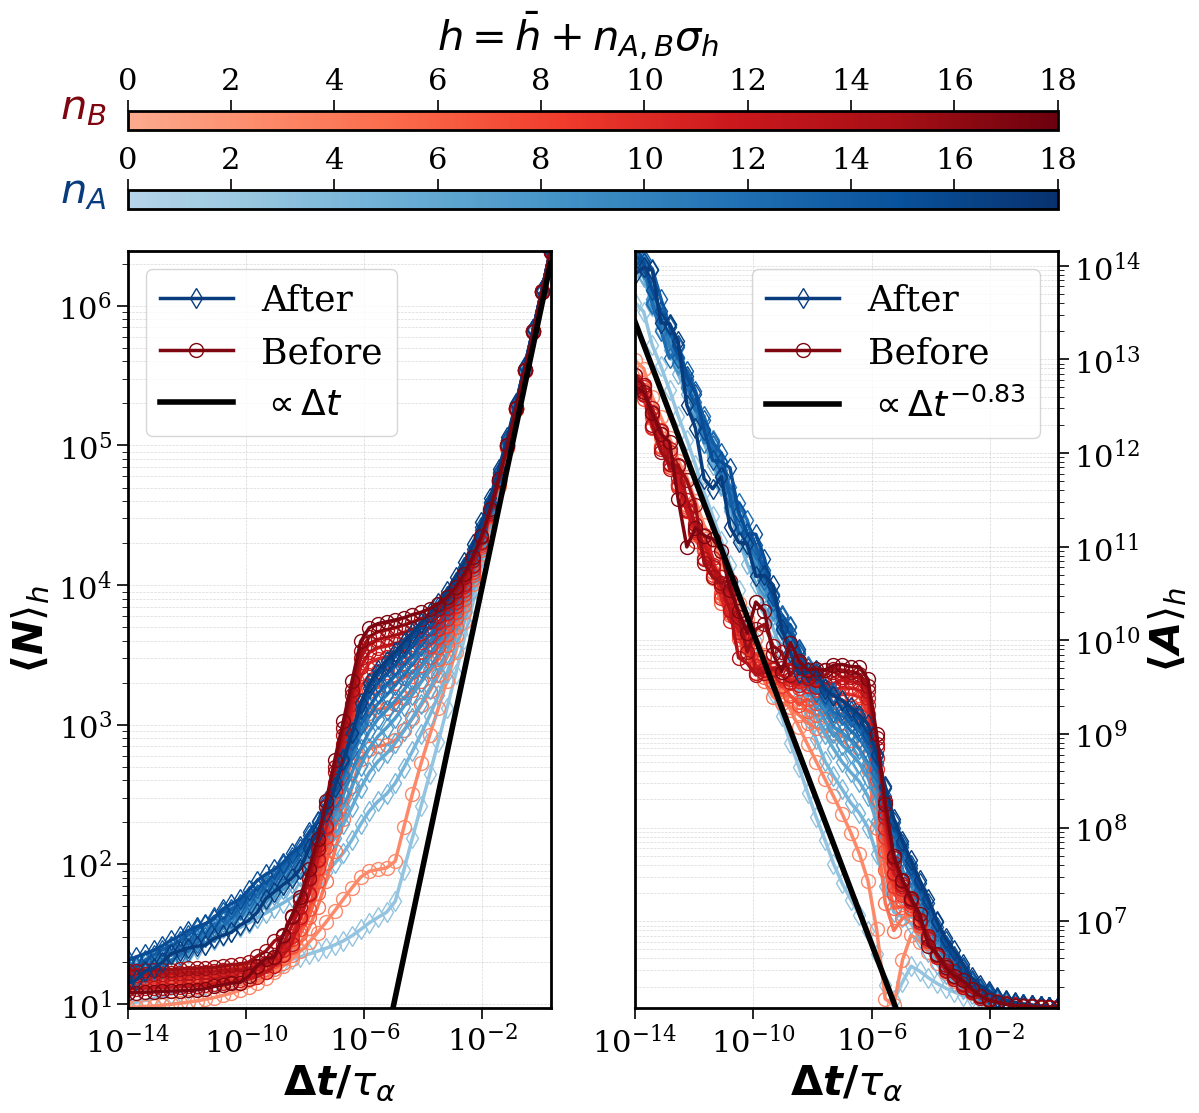

In [18]:
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    cmap_before = plt.get_cmap('Reds')
    colors_before = cmap_before(np.linspace(0.4, 0.95, N_H))
    cmap_after = plt.get_cmap('Blues')
    colors_after = cmap_after(np.linspace(0.4, 0.95, N_H))

    fig, axs = plt.subplots(1, 2, figsize=(12, 12), sharex=True)
    for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
        if i == len(N_STD)-1:
            axs[0].plot(time_windows, mean_n_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i], label=rf'After')
            axs[0].plot(time_windows, mean_n_before[h], linestyle='-', fillstyle='none', marker='o', color=colors_before[i], label=rf'Before')
            axs[1].plot(time_windows, mean_activity_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i], label=rf'After')
            axs[1].plot(time_windows, mean_activity_before[h], linestyle='-', marker='o', fillstyle='none', color=colors_before[i], label=rf'Before')
        else:
            axs[0].plot(time_windows, mean_n_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i])
            axs[0].plot(time_windows, mean_n_before[h], linestyle='-', fillstyle='none', marker='o', color=colors_before[i])
            axs[1].plot(time_windows, mean_activity_after[h], linestyle='-',marker=r'd', fillstyle='none', color=colors_after[i])
            axs[1].plot(time_windows, mean_activity_before[h], linestyle='-', marker='o', fillstyle='none', color=colors_before[i])

    axs[0].plot(time_windows, 1e6 * time_windows, linestyle='-', color='black', label=r'$\propto \Delta t$', linewidth=4)
    axs[1].plot(time_windows, 6e1 * time_windows**(-0.83), linestyle='-', color='black', label=r'$\propto \Delta t^{-0.83}$', linewidth=4)

    axs[0].legend()
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
    axs[0].grid(True, alpha=0.3, which='both', ls='--')
    axs[0].set_xlim(min(time_windows), max(time_windows))
    axs[0].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                    max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

    axs[1].legend()
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[1].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
    axs[1].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')
    axs[1].grid(True, alpha=0.3, which='both', ls='--')
    axs[1].set_xlim(min(time_windows), max(time_windows))
    axs[1].set_ylim(min([mean_activity_before[h].min() for h in HEIGHTS] + [mean_activity_after[h].min() for h in HEIGHTS]),
                    max([mean_activity_before[h].max() for h in HEIGHTS] + [mean_activity_after[h].max() for h in HEIGHTS]))
    axs[1].yaxis.tick_right()
    axs[1].yaxis.set_label_position("right")

    # Create horizontal colorbars
    norm_before = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_before = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_before(np.linspace(0.3, 0.99, 256))), norm=norm_before)
    sm_before.set_array([])
    cbar_before = fig.colorbar(sm_before, ax=axs, orientation='horizontal', fraction=0.05, pad=0.04, aspect=50,
                               location='top')

    norm_after = mcolors.Normalize(vmin=min(N_STD), vmax=max(N_STD))
    sm_after = cm.ScalarMappable(cmap=cm.colors.ListedColormap(cmap_after(np.linspace(0.3, 0.99, 256))), norm=norm_after)
    sm_after.set_array([])
    cbar_after = fig.colorbar(sm_after, ax=axs, orientation='horizontal', fraction=0.05, pad=0.05, aspect=50,
                              location='top')

    # Add text annotations
    fig.text(0.088, 0.79, r'$n_A$', va='center', ha='center', rotation=0, fontsize=30, color=colors_after[-1])
    fig.text(0.088, 0.86, r'$n_B$', va='center', ha='center', rotation=0, fontsize=30, color=colors_before[-1])
    fig.text(0.5, 0.92, r'$h = \bar{h} + n_{A,B}\sigma_h$', va='center', ha='center', rotation=0, fontsize=30,
             color='black')

    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'norm_activity_vs_time2.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'norm_activity_vs_time2.pkl'), 'wb') as f:
            pickle.dump(fig, f)

    plt.show()

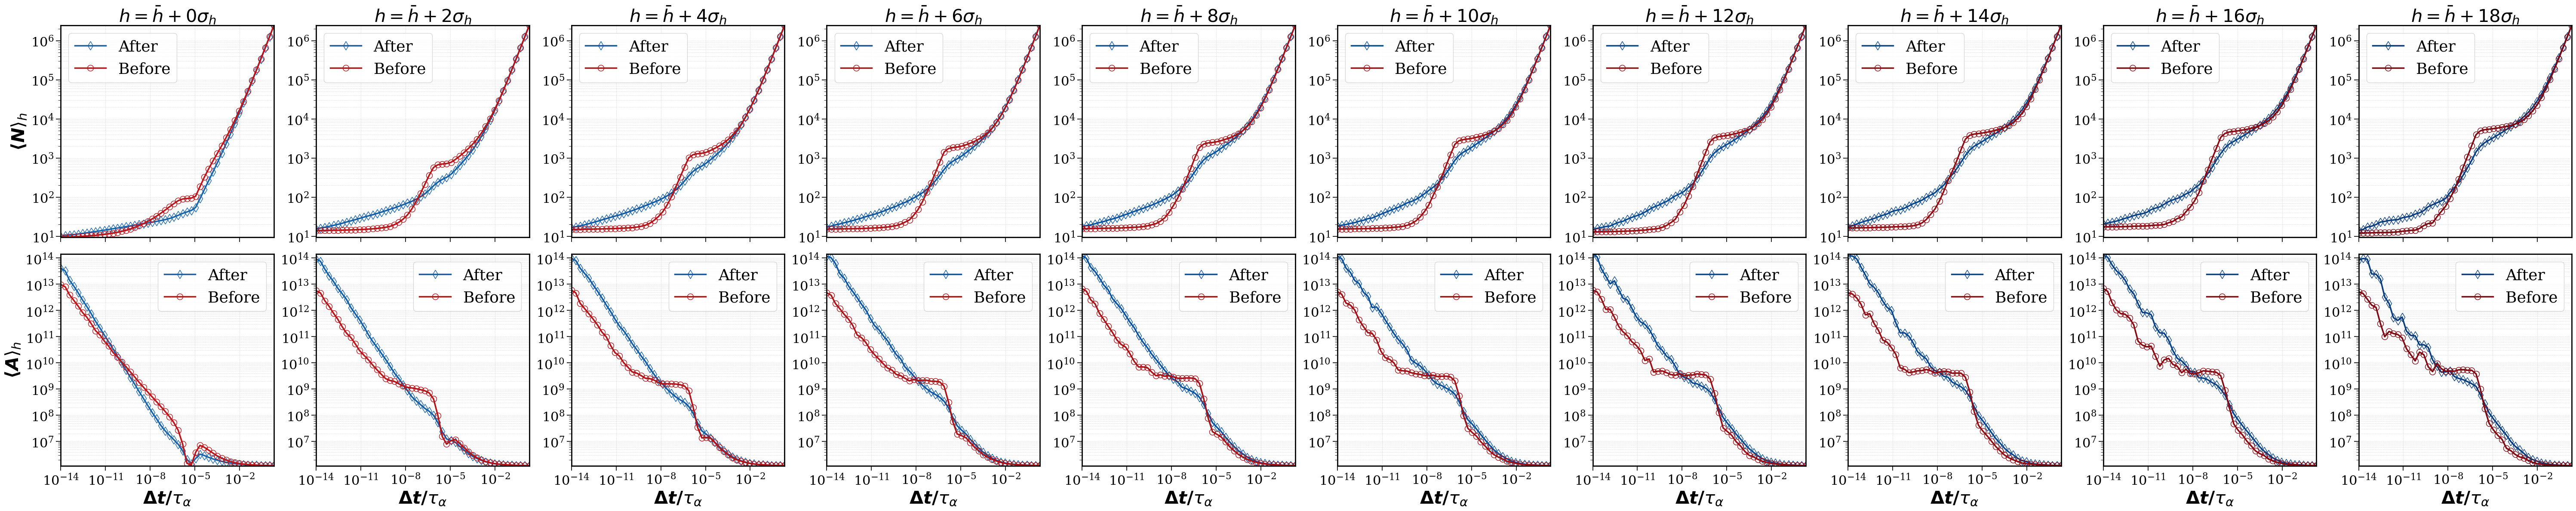

In [19]:
if COMPUTE_ACTIVITY_FOR_GIVEN_HEIGHTS:
    cmap_before = plt.get_cmap('Reds')
    colors_before = cmap_before(np.linspace(0.8, 0.95, N_H))
    cmap_after = plt.get_cmap('Blues')
    colors_after = cmap_after(np.linspace(0.8, 0.95, N_H))

    fig, axs = plt.subplots(2, N_H, figsize=(6*N_H, 12), sharex=True)
    for i, (h, n_std) in enumerate(zip(HEIGHTS, N_STD)):
        axs[0, i].plot(time_windows, mean_n_after[h], linestyle='-', fillstyle='none', marker=r'd', color=colors_after[i], label='After')
        axs[0, i].plot(time_windows, mean_n_before[h], linestyle='-', fillstyle='none', marker='o', color=colors_before[i], label='Before')
        axs[1, i].plot(time_windows, mean_activity_after[h], linestyle='-', marker=r'd', fillstyle='none', color=colors_after[i], label='After')
        axs[1, i].plot(time_windows, mean_activity_before[h], linestyle='-', marker='o', color=colors_before[i], fillstyle='none', label='Before')

        axs[0, i].set_xscale('log')
        axs[0, i].set_yscale('log')
        axs[0, i].set_title(rf'$h=\bar h+{n_std:.0f}\sigma_h$')
        axs[0, i].grid(True, alpha=0.3, which='both', ls='--')
        axs[0, i].legend(loc='upper left')
        axs[0, i].set_xlim(min(time_windows), max(time_windows))
        axs[0, i].set_ylim(min([mean_n_before[h].min() for h in HEIGHTS] + [mean_n_after[h].min() for h in HEIGHTS]),
                           max([mean_n_before[h].max() for h in HEIGHTS] + [mean_n_after[h].max() for h in HEIGHTS]))

        axs[1, i].set_xscale('log')
        axs[1, i].set_yscale('log')
        axs[1, i].legend(loc='upper right')
        axs[1, i].set_xlabel(r'$\boldsymbol{\Delta t/\tau_\alpha}$')
        axs[1, i].grid(True, alpha=0.3, which='both', ls='--')
        axs[1, i].set_xlim(min(time_windows), max(time_windows))
        axs[1, i].set_ylim(min([mean_activity_before[h].min() for h in HEIGHTS] + [mean_activity_after[h].min() for h in HEIGHTS]),
                           max([mean_activity_before[h].max() for h in HEIGHTS] + [mean_activity_after[h].max() for h in HEIGHTS]))

    axs[0, 0].set_ylabel(r'$\boldsymbol{\langle N\rangle_h}$')
    axs[1, 0].set_ylabel(r'$\boldsymbol{\langle A\rangle_h}$')

    plt.tight_layout()

    if SAVE_PLOT:
        save_dir = os.path.join(FIGURE_DIR)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(os.path.join(save_dir, 'activity_vs_time_all.pdf'), bbox_inches='tight')
        with open(os.path.join(save_dir, 'activity_vs_time_all.pkl'), 'wb') as f:
            pickle.dump(fig, f)

    plt.show()

In [20]:
print("Number of peaks per height:")
for h in HEIGHTS:
    print(f"Height: {h:.2e}, Number of peaks: {all_n_peaks[h]}")

Number of peaks per height:
Height: 1.58e+07, Number of peaks: 113272
Height: 1.23e+08, Number of peaks: 36507
Height: 2.29e+08, Number of peaks: 19176
Height: 3.36e+08, Number of peaks: 11371
Height: 4.43e+08, Number of peaks: 7187
Height: 5.50e+08, Number of peaks: 4654
Height: 6.56e+08, Number of peaks: 2954
Height: 7.63e+08, Number of peaks: 2161
Height: 8.70e+08, Number of peaks: 1541
Height: 9.77e+08, Number of peaks: 1028


# Interevent time statistics

In [21]:
times0 = all_failure_times[0]
diff = np.diff(times0)
non_zero_diff = diff[diff > 0]
min_diff = np.min(non_zero_diff)
print(f"Average time between events: {np.mean(diff):.5e}")
print(f"Minimum time between events: {min_diff:.5e}")
print(f"Maximum time between events: {np.max(diff):.5e}")

Average time between events: 7.28317e-07
Minimum time between events: 1.77636e-15
Maximum time between events: 1.37024e-03


In [22]:
normalized_diff = non_zero_diff / np.mean(diff)
fit_diff = powerlaw.Fit(normalized_diff, xmin=min(normalized_diff), xmax=max(normalized_diff), discrete=False)
print(f"Power-law exponent for time between events: {fit_diff.alpha:.2f}")

Power-law exponent for time between events: 1.08


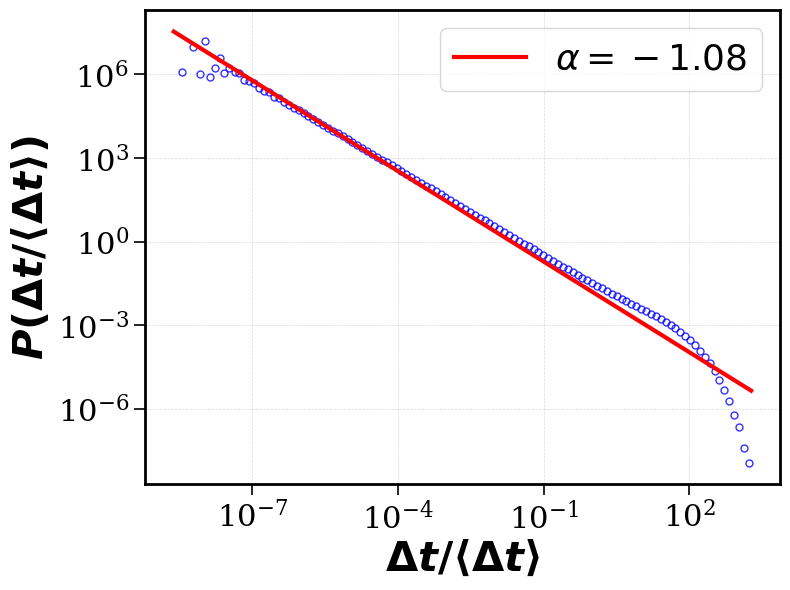

In [23]:
fit_diff.plot_pdf(color='b', marker='.', linestyle='None', fillstyle='none', alpha=0.8)
fit_diff.power_law.plot_pdf(color='r', linestyle='-', label=rf'$\alpha=-{fit_diff.alpha:.2f}$', linewidth=3)
plt.xlabel(r'$\boldsymbol{\Delta t/\langle \Delta t\rangle}$')
plt.ylabel(r'$\boldsymbol{P(\Delta t/\langle \Delta t\rangle)}$')
plt.legend()
plt.grid(True, alpha=0.3, linestyle='--', which='both')
plt.tight_layout()
plt.show()